In [31]:
print("Hello World")

Hello World


In [32]:
import pandas as pd
df = pd.read_csv('insurance.csv')  # replace 'your_dataset.csv' with your actual dataset file
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
print(df.isnull().sum())



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [35]:
categorical_columns = ['sex', 'smoker', 'region']
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in sex: ['female' 'male']
Unique values in smoker: ['yes' 'no']
Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


In [36]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [37]:
df = pd.get_dummies(df, columns=['region'])
df.head()



,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [38]:
df['region_northeast'] = df['region_northeast'].astype(int)
df['region_northwest'] = df['region_northwest'].astype(int)
df['region_southeast'] = df['region_southeast'].astype(int)
df['region_southwest'] = df['region_southwest'].astype(int)

df


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (Accuracy): {r2}')


Mean Squared Error: 33596915.85136146
R-squared (Accuracy): 0.7835929767120723


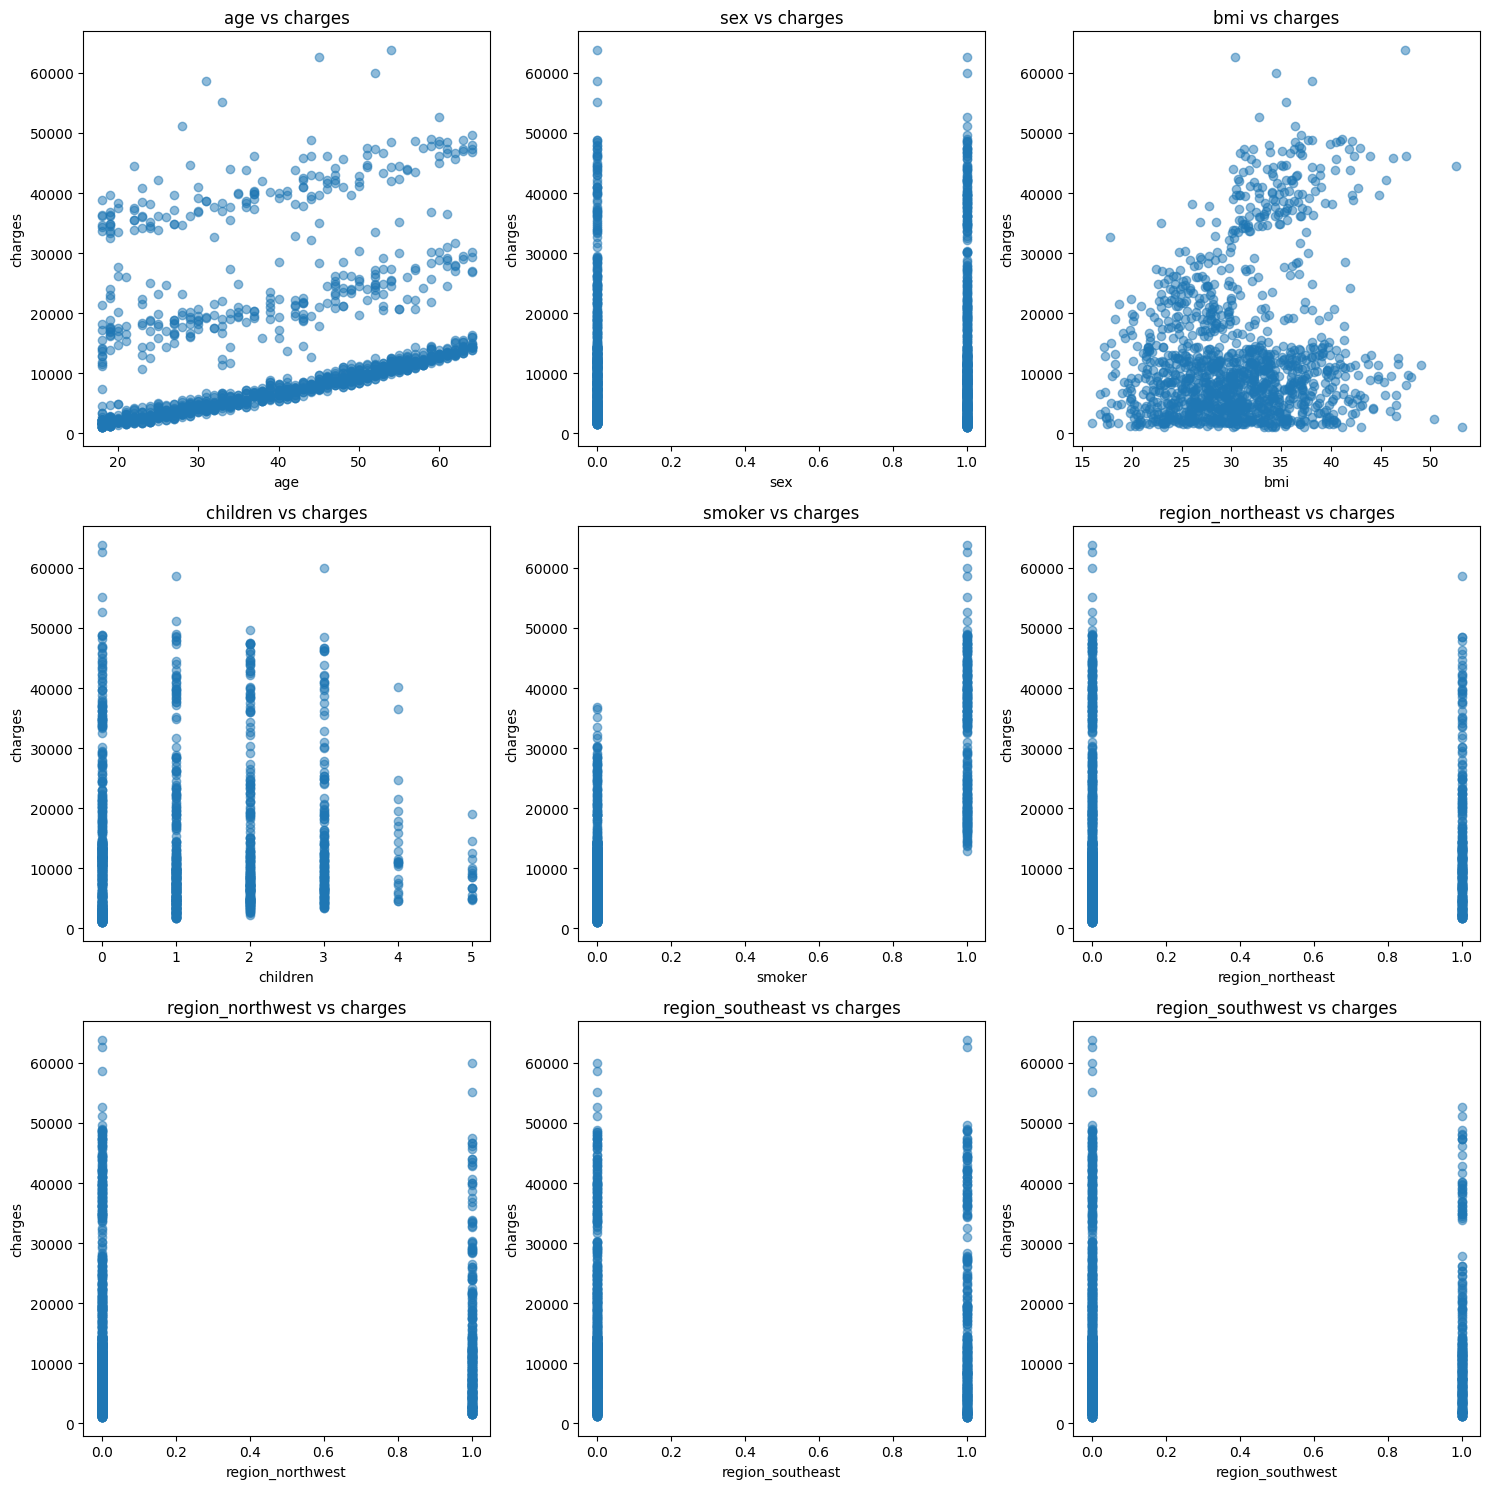

In [42]:
import matplotlib.pyplot as plt

features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].scatter(df[feature], df['charges'], alpha=0.5)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('charges')
    axes[idx].set_title(f'{feature} vs charges')

plt.tight_layout()
plt.show()


In [47]:
# Create interaction term between age and smoker
# Create interaction terms
df['age_smoker'] = df['age'] * df['smoker']
df['bmi_smoker'] = df['bmi'] * df['smoker'] 
df['age_bmi'] = df['age'] * df['bmi']
df['age_squared'] = df['age'] ** 2
df['bmi_squared'] = df['bmi'] ** 2

# Update features with interaction terms
X = df.drop('charges', axis=1)
y = df['charges']

# Split data with stratification on smoker status since it's highly important
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['smoker'])

# Scale the features for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model with interaction terms
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nEnhanced model with multiple interactions:")
print(f'Mean Squared Error: {mse}')
print(f'R-squared (Accuracy): {r2}')

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))



Enhanced model with multiple interactions:
Mean Squared Error: 20519316.25228377
R-squared (Accuracy): 0.8609171581036414

Feature Importance:
             Feature   Coefficient
10        bmi_smoker  19404.015192
12       age_squared   3929.832158
2                bmi   2968.179050
3           children    779.797813
11           age_bmi    533.415797
5   region_northeast    351.061239
6   region_northwest     64.739525
7   region_southeast   -204.535261
8   region_southwest   -205.319046
9         age_smoker   -226.540149
1                sex   -386.778150
0                age   -653.956501
13       bmi_squared  -3264.878050
4             smoker  -9077.372500


In [48]:
# Save the trained model and scaler using joblib
import joblib

# Save the model
joblib.dump(model, 'insurance_prediction_model.joblib')

# Save the scaler since we'll need it to preprocess new data
joblib.dump(scaler, 'insurance_scaler.joblib')

print("\nModel and scaler have been saved successfully.")
print("- Model saved as: insurance_prediction_model.joblib")
print("- Scaler saved as: insurance_scaler.joblib")

# Example of how to load and use the saved model:
"""
# Load the saved model and scaler
loaded_model = joblib.load('insurance_prediction_model.joblib')
loaded_scaler = joblib.load('insurance_scaler.joblib')

# For new data prediction:
# 1. Scale the new data using loaded_scaler
# 2. Make predictions using loaded_model.predict()
"""



Model and scaler have been saved successfully.
- Model saved as: insurance_prediction_model.joblib
- Scaler saved as: insurance_scaler.joblib


"\n# Load the saved model and scaler\nloaded_model = joblib.load('insurance_prediction_model.joblib')\nloaded_scaler = joblib.load('insurance_scaler.joblib')\n\n# For new data prediction:\n# 1. Scale the new data using loaded_scaler\n# 2. Make predictions using loaded_model.predict()\n"